In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as st
from collections import Counter

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import roc_auc_score, confusion_matrix, roc_curve
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve,f1_score, fbeta_score, classification_report

import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.plotting import plot_decision_regions
%matplotlib inline
import json


## The Full Dataset

In [5]:
covid_clean = pd.read_json('covid_no_nan.json', lines=True)

In [6]:
covid_clean.shape

(561096, 24)

In [7]:
categoricals = [ 'sex','patient_type', 'pneumonia', 'diabetes', 'copd', 'asthma', 'inmsupr',
       'hypertension', 'other_disease', 'cardiovascular', 'obesity',
       'renal_chronic', 'tobacco', 'pregnancy', 'icu', 'intubed', 'covid_res',
       'contact_other_covid', 'passed']

In [7]:
covid_clean[categoricals] = covid_clean[categoricals].astype('category')

In [8]:
features = ['sex','patient_type', 'pneumonia', 'diabetes', 'copd', 'asthma', 'inmsupr',
       'hypertension', 'other_disease', 'cardiovascular', 'obesity',
       'renal_chronic', 'tobacco', 'pregnancy',  'covid_res',
       'contact_other_covid']

In [9]:
# train / test split
xtrain, xtest, ytrain, ytest = train_test_split(covid_clean[features], covid_clean['passed'], test_size=0.2, random_state=33, stratify=covid_clean['passed'].values)

In [10]:
# train / validation split
xtrain, xval, ytrain, yval = train_test_split(xtrain, ytrain, test_size=0.2, random_state=33, stratify=ytrain.values )

In [11]:
RF = RandomForestClassifier(n_estimators=100)

RF.fit(xtrain, ytrain)
RF.score(xval, yval)

0.9362413117091427

In [12]:
print(classification_report(ytrain, RF.predict(xtrain)))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97     84096
           1       0.49      0.15      0.23      5680

    accuracy                           0.94     89776
   macro avg       0.72      0.57      0.60     89776
weighted avg       0.92      0.94      0.92     89776



In [15]:
print(classification_report(yval, RF.predict(xval)))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97    105119
           1       0.49      0.15      0.23      7101

    accuracy                           0.94    112220
   macro avg       0.72      0.57      0.60    112220
weighted avg       0.92      0.94      0.92    112220



In [13]:
RF.feature_importances_

array([0.0195817 , 0.31931486, 0.28226939, 0.04568887, 0.01633893,
       0.00892371, 0.01363595, 0.04187437, 0.01528903, 0.01555293,
       0.01865994, 0.01837724, 0.01690485, 0.00239388, 0.12538074,
       0.03981361])

<BarContainer object of 16 artists>

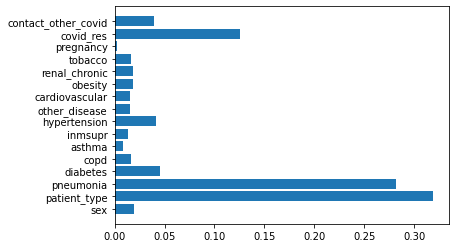

In [14]:
plt.barh(xtrain.columns, RF.feature_importances_);

In [44]:
rf1_cm = confusion_matrix(yval, RF.predict(xval))

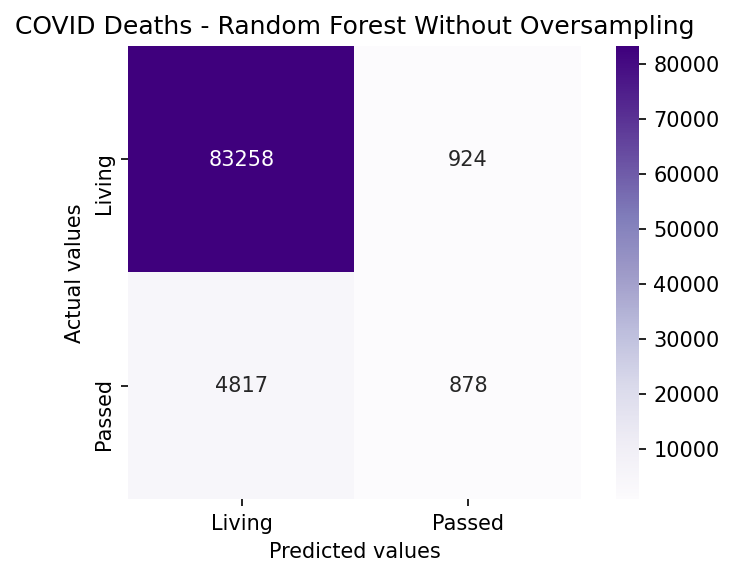

In [45]:
plt.figure(dpi=150)
sns.heatmap(rf1_cm, cmap=plt.cm.Purples, annot=True, fmt='d', square=True,
           xticklabels=['Living', 'Passed'],
           yticklabels=['Living', 'Passed'])

plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.title('COVID Deaths - Random Forest Without Oversampling')
plt.savefig('COVID_RF1_conf_matrix', dpi=600, bbox_inches='tight');

In [16]:
# cells added at end of project
rf1_test_cm = confusion_matrix(ytest, RF.predict(xtest))

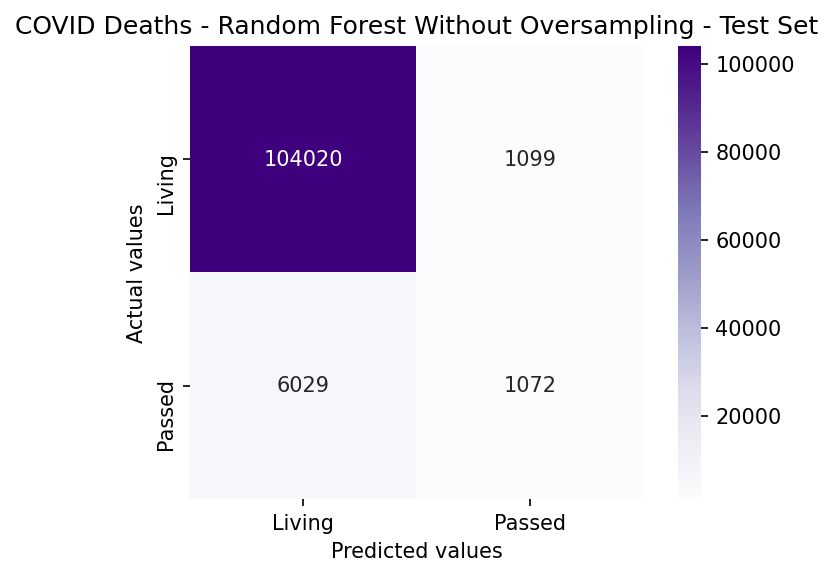

In [17]:
# cells added at end of project
plt.figure(dpi=150)
sns.heatmap(rf1_test_cm, cmap=plt.cm.Purples, annot=True, fmt='d', square=True,
           xticklabels=['Living', 'Passed'],
           yticklabels=['Living', 'Passed'])

plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.title('COVID Deaths - Random Forest Without Oversampling - Test Set')
plt.savefig('COVID_RF1_test_conf_matrix', dpi=600, bbox_inches='tight');

In [12]:
import pickle
import os

if not os.path.exists('models'):
    os.makedirs('models')

In [13]:
    with open("models/random_forest.pickle", "wb") as pfile:
        pickle.dump(RF, pfile)

### Random Forest Model with Basic Oversampling

In [28]:
!pip install mlxtend

     |████████████████████████████████| 1.3 MB 2.9 MB/s eta 0:00:01


In [22]:
!pip install imblearn

     |████████████████████████████████| 167 kB 2.9 MB/s eta 0:00:01


In [24]:
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
ros=RandomOverSampler(random_state=33)
x_resampled, y_resampled = ros.fit_sample(xtrain, ytrain)

Counter(y_resampled)

Counter({0: 336728, 1: 336728})

In [32]:
RF2 = RandomForestClassifier(n_estimators=100)

RF2.fit(x_resampled, y_resampled)
# RF.score(xval, yval)

RandomForestClassifier()

In [39]:
rf2_cm = confusion_matrix(yval, RF2.predict(xval))

In [40]:
rf2_cm

array([[70809, 13373],
       [  532,  5163]])

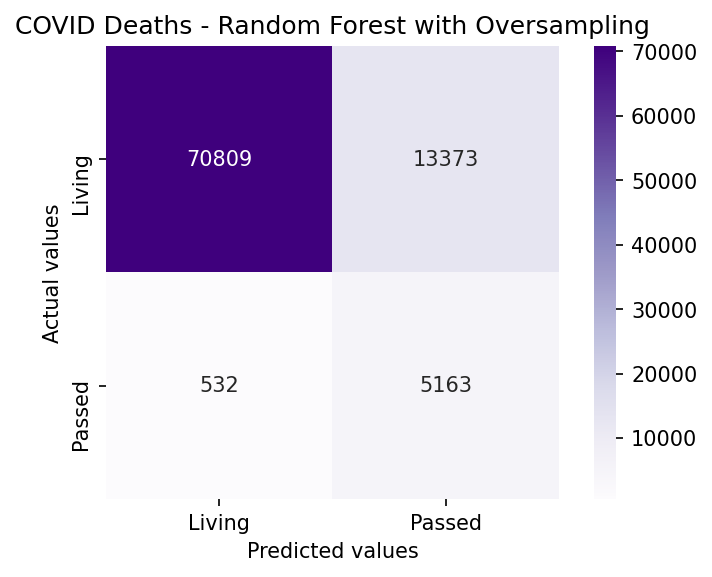

In [42]:
plt.figure(dpi=150)
sns.heatmap(rf2_cm, cmap=plt.cm.Purples, annot=True, fmt='d', square=True,
           xticklabels=['Living', 'Passed'],
           yticklabels=['Living', 'Passed'])

plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.title('COVID Deaths - Random Forest with Oversampling')
plt.savefig('COVID_RF2_OS_conf_matrix', dpi=600, bbox_inches='tight');

In [43]:
# results worse than linear regression without stratifying or oversampling. Ugh.

In [46]:
print(classification_report(yval, RF2.predict(xval)))

              precision    recall  f1-score   support

           0       0.99      0.84      0.91     84182
           1       0.28      0.91      0.43      5695

    accuracy                           0.85     89877
   macro avg       0.64      0.87      0.67     89877
weighted avg       0.95      0.85      0.88     89877



In [47]:
print(classification_report(yval, RF.predict(xval)))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97     84182
           1       0.49      0.15      0.23      5695

    accuracy                           0.94     89877
   macro avg       0.72      0.57      0.60     89877
weighted avg       0.92      0.94      0.92     89877



### Random Forest with Synthetic Oversampling

In [49]:
from imblearn.over_sampling import SMOTE
X_smoted, y_smoted = SMOTE(random_state=42).fit_sample(xtrain,ytrain)

In [50]:
Counter(y_smoted)

Counter({0: 336728, 1: 336728})

In [51]:
RF3 = RandomForestClassifier(n_estimators=100)
RF3.fit(X_smoted, y_smoted)

rf3_cm = confusion_matrix(yval, RF3.predict(xval))

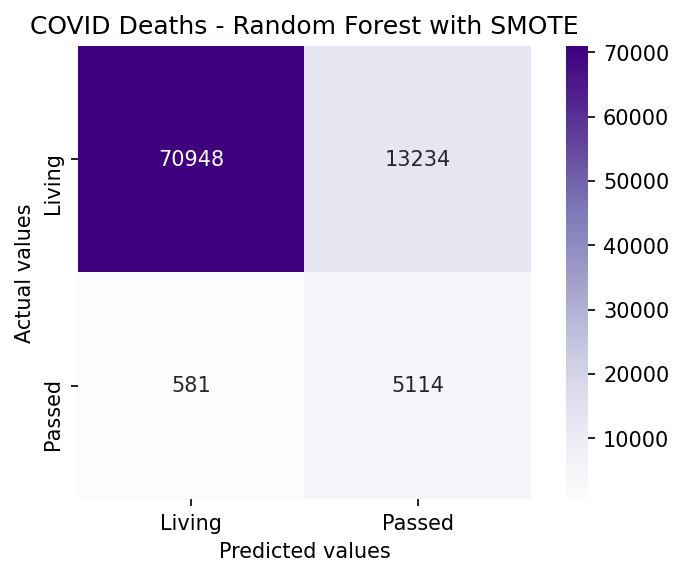

In [52]:
plt.figure(dpi=150)
sns.heatmap(rf3_cm, cmap=plt.cm.Purples, annot=True, fmt='d', square=True,
           xticklabels=['Living', 'Passed'],
           yticklabels=['Living', 'Passed'])

plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.title('COVID Deaths - Random Forest with SMOTE')
plt.savefig('COVID_RF3_SMOTE_conf_matrix', dpi=600, bbox_inches='tight');

In [53]:
print(classification_report(yval, RF3.predict(xval)))

              precision    recall  f1-score   support

           0       0.99      0.84      0.91     84182
           1       0.28      0.90      0.43      5695

    accuracy                           0.85     89877
   macro avg       0.64      0.87      0.67     89877
weighted avg       0.95      0.85      0.88     89877



In [54]:
print(classification_report(yval, RF.predict(xval)))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97     84182
           1       0.49      0.15      0.23      5695

    accuracy                           0.94     89877
   macro avg       0.72      0.57      0.60     89877
weighted avg       0.92      0.94      0.92     89877



In [55]:
print(classification_report(yval, RF2.predict(xval)))

              precision    recall  f1-score   support

           0       0.99      0.84      0.91     84182
           1       0.28      0.91      0.43      5695

    accuracy                           0.85     89877
   macro avg       0.64      0.87      0.67     89877
weighted avg       0.95      0.85      0.88     89877



### Random Forest Model with Undersampling

In [14]:
from imblearn.under_sampling import RandomUnderSampler
x_under, y_under = RandomUnderSampler(random_state=33).fit_sample(xtrain, ytrain)
Counter(y_under)

Counter({0: 22779, 1: 22779})

In [15]:
RF5 = RandomForestClassifier(n_estimators=100).fit(x_under,y_under)
rf5_cm = confusion_matrix(yval, RF5.predict(xval))

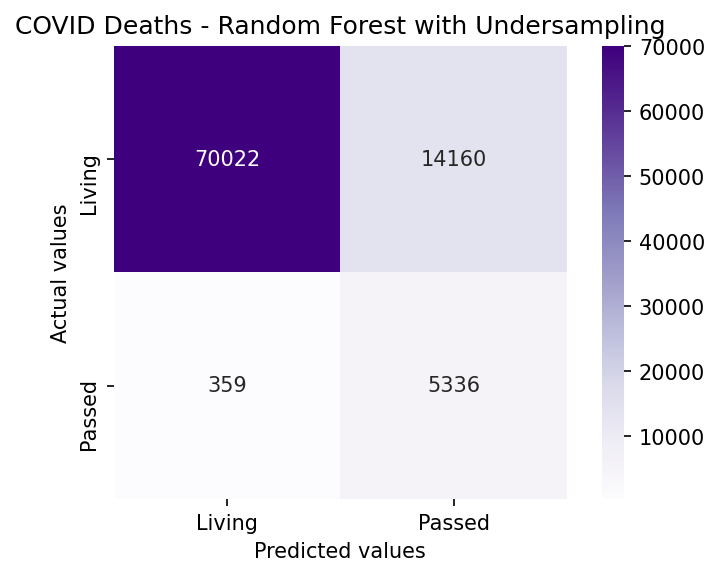

In [16]:
plt.figure(dpi=150)
sns.heatmap(rf5_cm, cmap=plt.cm.Purples, annot=True, fmt='d', square=True,
           xticklabels=['Living', 'Passed'],
           yticklabels=['Living', 'Passed'])

plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.title('COVID Deaths - Random Forest with Undersampling')
plt.savefig('COVID_RF5_undersample_conf_matrix', dpi=600, bbox_inches='tight');

In [17]:
# results very similar to oversampling in RF2 - RF1 did a better job with precision and accuracy
print(classification_report(yval, RF5.predict(xval)))

              precision    recall  f1-score   support

           0       0.99      0.83      0.91     84182
           1       0.27      0.94      0.42      5695

    accuracy                           0.84     89877
   macro avg       0.63      0.88      0.66     89877
weighted avg       0.95      0.84      0.88     89877



<BarContainer object of 16 artists>

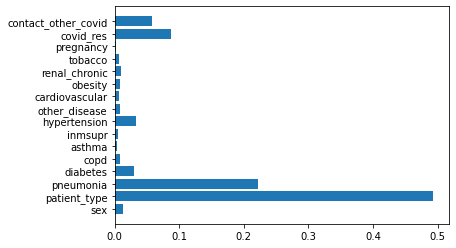

In [18]:
plt.barh(xtrain.columns, RF5.feature_importances_)

## Hospitalizations

In [19]:
covid_hosp = pd.read_json('covid_hosp.json', lines=True)

In [20]:
covid_hosp[categoricals] = covid_hosp[categoricals].astype('category')

In [21]:
# train / test split

xtrainh, xtesth, ytrainh, ytesth = train_test_split(covid_hosp[features], covid_hosp['passed'], test_size=0.2, random_state=33, stratify=covid_hosp['passed'].values)

In [22]:
# train / validation split
xtrainh, xvalh, ytrainh, yvalh = train_test_split(xtrainh, ytrainh, test_size=0.2, random_state=33, stratify=ytrainh.values )

### Hospitalization Subset - Baseline RF model

In [23]:
RFh = RandomForestClassifier(n_estimators=100)

RFh.fit(xtrainh, ytrainh)
RFh.score(xvalh, yvalh)

0.7305295950155763

In [33]:
print(classification_report(yvalh, RFh.predict(xvalh)))

              precision    recall  f1-score   support

           0       0.75      0.94      0.84     14136
           1       0.48      0.15      0.22      5124

    accuracy                           0.73     19260
   macro avg       0.62      0.54      0.53     19260
weighted avg       0.68      0.73      0.67     19260



Metrics from the full dataset for comparison:

                   precision    recall  f1-score   support

           0       0.95      0.99      0.97     84182
           1       0.49      0.15      0.23      5695

    accuracy                           0.94     89877
    
   macro avg       0.72      0.57      0.60     89877
   
weighted avg       0.92      0.94      0.92     89877

<BarContainer object of 16 artists>

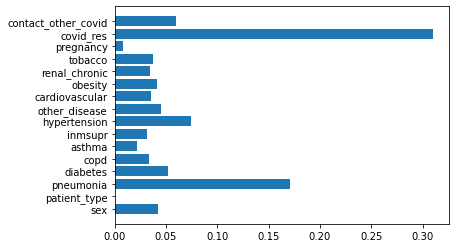

In [35]:
plt.barh(xtrainh.columns, RFh.feature_importances_);

## The Immunosuppressed Subset

In [24]:
covid_immun = pd.read_json('covid_immun.json', lines=True)

In [25]:
covid_immun[categoricals] = covid_immun[categoricals].astype('category')

In [26]:
# train / test split

xtraini, xtesti, ytraini, ytesti = train_test_split(covid_immun[features], covid_immun['passed'], test_size=0.2, random_state=33, stratify=covid_immun['passed'].values)

In [29]:
# train / validation split
xtraini, xvali, ytraini, yvali = train_test_split(xtraini, ytraini, test_size=0.2, random_state=33, stratify=ytraini.values )

### Immunosuppression Subset - Baseline RF Model

In [30]:
RFi = RandomForestClassifier(n_estimators=100)

RFi.fit(xtraini, ytraini)
RFi.score(xvali, yvali)

0.8307017543859649

In [32]:
print(classification_report(yvali, RFi.predict(xvali)))

              precision    recall  f1-score   support

           0       0.87      0.94      0.90       968
           1       0.39      0.22      0.28       172

    accuracy                           0.83      1140
   macro avg       0.63      0.58      0.59      1140
weighted avg       0.80      0.83      0.81      1140



<BarContainer object of 16 artists>

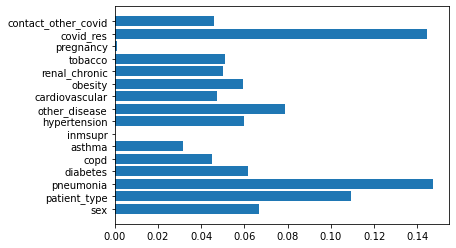

In [36]:
plt.barh(xtraini.columns, RFi.feature_importances_)